In [1]:
import numpy as np
import networkx as nx
from treeApproximation import TreeApproximator
import matplotlib.pyplot as plt

import os
import tarfile
import gzip
import shutil
%matplotlib inline


In [2]:
class T:
    def __init__(self, G):
        nodes = G.nodes()
        edges = G.edges()
        n = len(nodes)
        m = len(edges)
        self.table = self._create_table(n, edges)
        
    
    def _create_table(self, n, edges):
        table = np.zeros((n,n))
        for edge, _ in edges.items():
            source_id = edge[0]
            target_id = edge[1]
            
            table[source_id][target_id] = 1
            table[target_id][source_id] = 1   
        return table
    
    def produce_spanner(self):
        h = nx.from_numpy_matrix(self.table)
        return h
    
    def __str__(self):
        return str(self.table)    

        

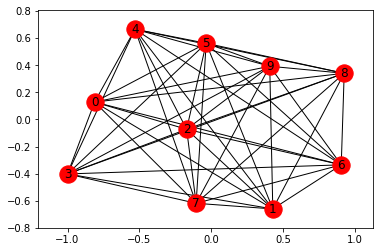

In [3]:
m = np.random.rand(10,10)
g = nx.from_numpy_matrix(m)
nx.draw_networkx(g)
t = T(g)

In [4]:
class Graph_Spanner:
    
    def __init__(self, graph, k=2):
        self.g = graph
        self.alpha = alpha
        self.beta = beta 
        
        self.h = self.greedy_spanner(k)
    
    def distance_g(self, u, v):
        try:
            return nx.shortest_path_length(self.g, u, v)
        except nx.NetworkXNoPath as e:
            return None        
    
    def distance_h(self, u, v):
        try:
            return nx.shortest_path_length(self.h, u, v)
        except nx.NetworkXNoPath as e:
            return None
    
    def greedy_spanner(self, k):
        g = self.g
        dists = nx.floyd_warshall_numpy(g).tolist()
        h = nx.Graph()
        for i in g.nodes:
            for j in g.nodes:     
                d = dists[i][j]
                if (d is not None) and (d > 2 * k - 1):
                    h.add_edge(i, j)
        return h
    
    def m_H(self):
        """
        m(H): size (# of edges) of spanner graph. 
        Lower is better. Performance metric. Returns an int. 
        """
        return self.h.number_of_edges()
        
        

In [5]:
import graphs as localGraphs
import sys

LOC = r"C:\Users\Zachary Bamberger\PycharmProjects\Deep_Learning\CS6820Project"
os.chdir(LOC)

cwd = os.getcwd()
print("currently in: " + cwd)
os.chdir("data")
files = os.listdir(os.getcwd())
print("files in data: " + str(files) + "\n")
print("Decompressing sample graphs...")

new_names = []
for name in files:   
    
    if name.endswith(".txt.gz"):
        
        print("name is: " + name)
        prefix = name.rsplit(".", 3)[0]
        print("prefix is: " + prefix)
        new_name = prefix + ".txt"
        new_names.append(new_name)
        
        if new_name in files:
            print("decopmpressed file already exists!\n")
            continue
        
        print("Reading compressed content")
        with gzip.open(name, 'rb') as fileHandle:
            content = fileHandle.readlines()
        print("Done reading compressed content")
        
        print("writing decompressed graph text file")
        with open(new_name, "w") as fileHandle:
            for line in content:
                line = line.decode("utf-8")
                if not line.isspace():
                    fileHandle.write(line)
        print("\n")

os.chdir("..")

print("loading email_graph...")
email_graph = localGraphs.email_graph()
print("successfully loaded email_graph!")
print("Creating spanner")
email_spanner = Graph_Spanner(email_graph)
print("\n")

print("loading road_graph...")
road_graph =  localGraphs.road_graph()
print("successfully loaded road_graph!")
road_spanner = Graph_Spanner(road_graph)
print("\n")

print("loading collab graph...")
collab_graph = localGraphs.collab_graph()
print("successfully loaded collab_graph")
print("nodes are:\n")
print(collab_graph.nodes)
collab_spanner = Graph_Spanner(collab_graph)
print("\n")

currently in: C:\Users\Zachary Bamberger\PycharmProjects\Deep_Learning\CS6820Project
files in data: ['ca-HepTh.txt', 'ca-HepTh.txt.gz', 'email-Eu-core-department-labels.txt', 'email-Eu-core-department-labels.txt.gz', 'email-Eu-core.txt', 'email-Eu-core.txt.gz', 'roadNet-CA.txt', 'roadNet-CA.txt.gz']

Decompressing sample graphs...
name is: ca-HepTh.txt.gz
prefix is: ca-HepTh
decopmpressed file already exists!

name is: email-Eu-core-department-labels.txt.gz
prefix is: email-Eu-core-department-labels
decopmpressed file already exists!

name is: email-Eu-core.txt.gz
prefix is: email-Eu-core
decopmpressed file already exists!

name is: roadNet-CA.txt.gz
prefix is: roadNet-CA
decopmpressed file already exists!

loading email_graph...
successfully loaded email_graph!
Creating spanner


loading road_graph...
successfully loaded road_graph!


MemoryError: 